# Milestone 2- {Bitcoin Analysis}
--- 
The analysis of bitcoin throught the years 2013 to 2018.
<br>
## Tasks
---
#### *Method Chaining and Python Programs*:
---

In [1]:
from scripts import project_functions as pf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
path1 = "../../data/raw/bitcoin_price_dataset.csv"
df = pf.load(path1)
df

Date Converted_Date      Open      High       Low     Close  \
0     Feb 20, 2018     2018-02-20  11231.80  11958.50  11231.80  11403.70   
1     Feb 19, 2018     2018-02-19  10552.60  11273.80  10513.20  11225.30   
2     Feb 18, 2018     2018-02-18  11123.40  11349.80  10326.00  10551.80   
3     Feb 17, 2018     2018-02-17  10207.50  11139.50  10149.40  11112.70   
4     Feb 16, 2018     2018-02-16  10135.70  10324.10   9824.82  10233.90   
...            ...            ...       ...       ...       ...       ...   
1755  May 02, 2013     2013-05-02    116.38    125.60     92.28    105.21   
1756  May 01, 2013     2013-05-01    139.00    139.89    107.72    116.99   
1757  Apr 30, 2013     2013-04-30    144.00    146.93    134.05    139.00   
1758  Apr 29, 2013     2013-04-29    134.44    147.49    134.00    144.54   
1759  Apr 28, 2013     2013-04-28    135.30    135.98    132.10    134.21   

             Volume       Market Cap  
0     9,926,540,000  189,536,000,000  
1     7,652,090,000  178,055,000,000  
2     8,744,010,000  187,663,000,000  
3     8,660,880,000  172,191,000,000  
4     7,296,160,000  170,960,000,000  
...             ...              ...  
1755              -    1,292,190,000  
1756              -    1,542,820,000  
1757              -    1,597,780,000  
1758              -    1,491,160,000  
1759              -    1,500,520,000  

[1760 rows x 8 columns]

***The table shown ABOVE is organized by increasing volume***
<br>
<br>

#### *Conduct an Exploratory Data Anaylysis on Dataset*
---

Firstly, in order to better understand our dataset, we must first understand its layout, which includes the number of rows and columns.

In [3]:
num_columns = pf.countColumns(df)
num_rows = pf.countRows(df)

print("Number of Rows: %d \nNumber of Cols: %d"%(num_rows,num_columns))

Number of Rows: 1760 
Number of Cols: 8


<br>

Now that we have the number of rows and columns, let us find out what the idetifiers for the columns are

In [4]:
pf.listColumns(df)

Date
Converted_Date
Open
High
Low
Close
Volume
Market Cap


We can see that there are indeed 7 columns: Date, Open, High, Low, Close, Volume and Market Cap.
Let us move on to see if there is any values that stand out which might be a possible error.

In [5]:
df.describe()

Open          High           Low         Close
count   1760.000000   1760.000000   1760.000000   1760.000000
mean    1479.574239   1536.991108   1418.251273   1485.747000
std     2950.457188   3092.950362   2780.859459   2959.265478
min       68.500000     74.560000     65.530000     68.430000
25%      274.730000    279.857500    268.640000    274.875000
50%      480.715000    495.195000    472.510000    482.810000
75%      870.085000    900.222500    831.682500    871.370000
max    19475.800000  20089.000000  18974.100000  19497.400000

From this, we can see the count of Open,High, Low and Close match each other, meaning that none of the values are missing or NA for those particular columns. The mean, min and max values seem to be reasonable and there are no outliers worth removing. Also, there are no varaibles that are redundant in this dataset, so no columns will be dropped. 
<br>
---
#### Cost VS Date Graph
The correlation between Cost and Date can be easily observed from the graph below. Each point on the graph is taken every 30 entries and we can observe from this graph that as time passed, the value of BitCoin increased. 

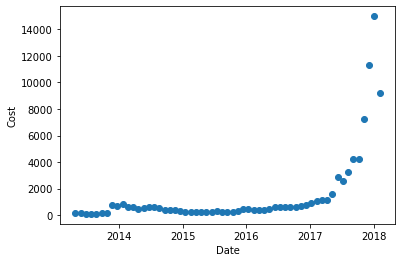

In [10]:
plt.scatter("Converted_Date","Close",data=df.iloc[::-30, :])
plt.ylabel("Cost")
plt.xlabel("Date")
plt.show()

---
#### Open VS Close Barplot
The two values below; Open and High represent the average opening price of the market, and the closing market price of the market respectively. As we can observe from the barplot, the average opening cost is lower than the average closing cost which identifies and supports the fact that bitcoin's value increases.

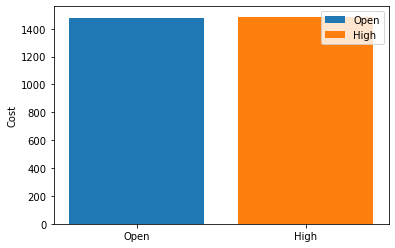

Average opening cost-Average closing cost: $6.17


In [3]:
pf.openCloseBarPlot(df)

We can see from the value above that the average closing cost is about $6.17 more than the opening cost. Now that there is a general idea about the trends, variables and definiitions, by observing the graphs and data depicted above further, we can analyze the situation to extract more information.
<br> 
<br>
---
#### *Further analysis and research questions:*
---
From our exploratory analysis, we can observe that the trend of bitcoin from the year 2013 to 2018 is increasing. We notice an exponential increase in cost between the years 2016-2018. In order to find out about this in more detail, a graph depicting solely the years 2017-2018 will be made.

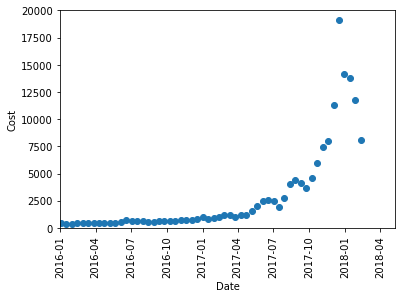

In [46]:
plt.scatter("Converted_Date","Close",data=df.iloc[::-14, :])
plt.ylabel("Cost")
plt.xlabel("Date")
plt.xticks(rotation='90')
plt.ylim(0,20000)
plt.xlim(datetime.date(2016, 1, 1))
plt.show()

The above graph depics the biweekly closing cost of BitCoin starting from the year 2016. As we move along the date axis, we can observe the price shoots up in the year 2018 to a high of nearly 16000. For comparison, let us take a look at a similar graph, before the year 2016.

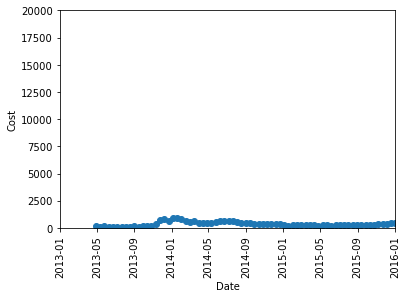

In [44]:
plt.scatter("Converted_Date","Close",data=df.iloc[::-14, :])
plt.ylabel("Cost")
plt.xlabel("Date")
plt.xticks(rotation='90')
plt.ylim(0,20000)
plt.xlim(datetime.date(2013, 1, 1),datetime.date(2016, 1, 1))
plt.show()

<br>
Now we can analyze the yearly average open, high and low prices. The datasets first entry is Apr 28, 2013 and so the in the table below, the index 0 refers to Apr 28,2013 + 365 Days.


In [10]:
yearlydf = df[::-1]
yearlydf = (
    yearlydf.groupby(np.arange(len(yearlydf))//365)
    .mean()
    .round(2)
)
yearlydf

Open     High      Low    Close
0   381.24   397.18   362.67   381.95
1   400.15   407.83   391.99   399.64
2   325.64   331.03   320.90   326.22
3   774.57   787.32   762.44   776.65
4  6390.89  6676.93  6084.18  6423.62

What we can extrapolate from the table above are comparisons between the year open and closing, and High and Low. The data shows that as the years progress, the value of bitcoin rose. The only exception to this is year 2, where the opening mean of year 1 was 400.14 dropping to 325.64 in year 2. Taking a look at the previous years, notice that the prices in year 2 actually drop to a lower value than in year 0. Interestingly enough, while year 2's average dips below year 1, the increase to 774.57 in year 3 shows the beginning of the exponential increase in price.
To observe the patterns within these 4 years, we can plot a bar graph.

<AxesSubplot:>

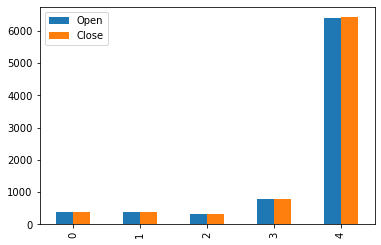

In [15]:
yearlydf.plot.bar(y=["Open","Close"])

<AxesSubplot:>

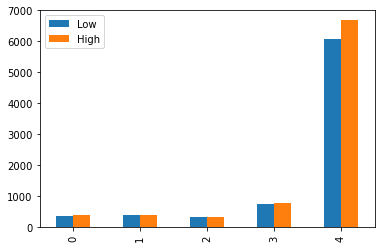

In [16]:
yearlydf.plot.bar(y=["Low","High"])